In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud
import plotly.express as px
import folium
import statsmodels.api as sm
import geopandas as gpd
import warnings
import missingno as msno

In [2]:
airbnb = pd.read_csv("Airbnb_Data.csv")

In [3]:
airbnb.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [4]:
airbnb.shape

(102599, 26)

In [5]:
airbnb.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [6]:
airbnb.describe()

,id,host id,lat,long,Construction year,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,1.025990e+05,1.025990e+05,102591.000000,102591.000000,102385.000000,102190.000000,102416.000000,86720.000000,102273.000000,102280.000000,102151.000000
mean,2.914623e+07,4.925411e+10,40.728094,-73.949644,2012.487464,8.135845,27.483743,1.374022,3.279106,7.936605,141.133254
std,1.625751e+07,2.853900e+10,0.055857,0.049521,5.765556,30.553781,49.508954,1.746621,1.284657,32.218780,135.435024
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,2003.000000,-1223.000000,0.000000,0.010000,1.000000,1.000000,-10.000000
25%,1.508581e+07,2.458333e+10,40.688740,-73.982580,2007.000000,2.000000,1.000000,0.220000,2.000000,1.000000,3.000000
50%,2.913660e+07,4.911774e+10,40.722290,-73.954440,2012.000000,3.000000,7.000000,0.740000,3.000000,1.000000,96.000000
75%,4.320120e+07,7.399650e+10,40.762760,-73.932350,2017.000000,5.000000,30.000000,2.000000,4.000000,2.000000,269.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,2022.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,3677.000000


In [7]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

It is clear that the data has a lot of null values and cleaning needs to be done.

In [8]:
# check nulls
airbnb.isnull().sum()

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

<AxesSubplot:>

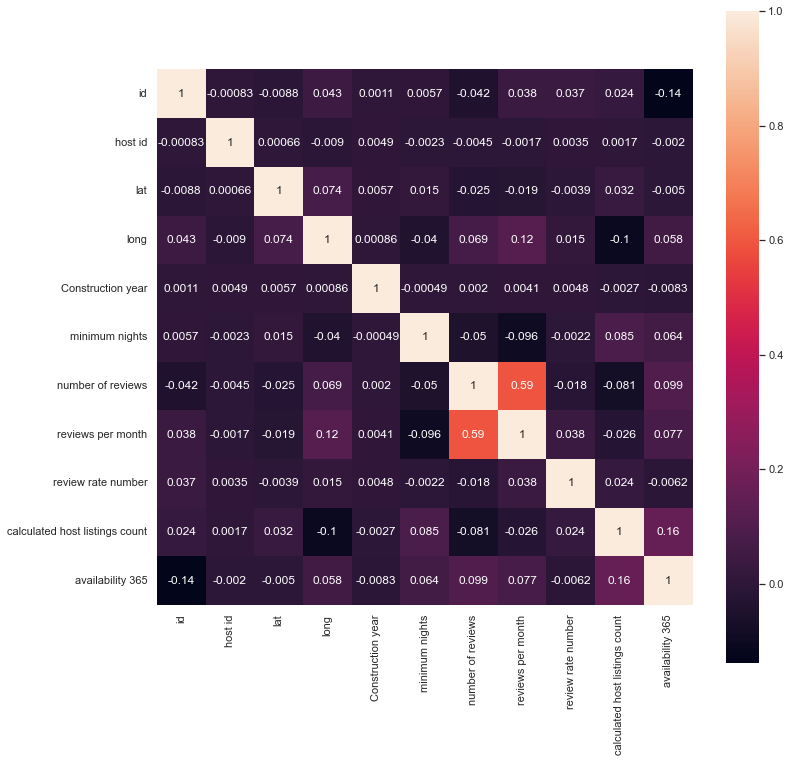

In [9]:
sns.set(rc={"figure.figsize":(12, 12)})
sns.heatmap(airbnb.corr(), annot=True, square=True)

# EDA and Data cleaning

In [10]:
airbnb.drop_duplicates(inplace=True)

In [11]:
airbnb.shape

(102058, 26)

541 duplicated rows have been removed

In [12]:
# Dropping columns with missing values greater than 50%
print(airbnb.columns[airbnb.isnull().mean() > 0.5], "\n")
airbnb = airbnb.drop(airbnb.columns[airbnb.isnull().mean() > 0.5], axis=1)


Index(['house_rules', 'license'], dtype='object') 



In [13]:
# Convert 'last review' column to datetime type
airbnb['last review'] = pd.to_datetime(airbnb['last review'])

In [14]:
airbnb['price'] = airbnb['price'].str.replace('$', '').str.replace(',', '').astype(float)
airbnb['service fee'] = airbnb['service fee'].str.replace('$', '').str.replace(',', '').astype(float)

In [15]:
airbnb['price']

0          966.0
1          142.0
2          620.0
3          368.0
4          204.0
           ...  
102053     696.0
102054     909.0
102055     387.0
102056     848.0
102057    1128.0
Name: price, Length: 102058, dtype: float64

In [16]:
airbnb['service fee']

0         193.0
1          28.0
2         124.0
3          74.0
4          41.0
          ...  
102053      NaN
102054      NaN
102055      NaN
102056      NaN
102057      NaN
Name: service fee, Length: 102058, dtype: float64

Dropping the null value rows from all the above mentioned features

In [17]:
Drop_list = ['price','NAME','host_identity_verified', 'neighbourhood group','neighbourhood', 'cancellation_policy', 'instant_bookable', 'host name','Construction year', 'lat','long']

for i in Drop_list:
    airbnb = airbnb.dropna(subset = [i])

In [18]:
airbnb.shape

(100595, 24)

Droping columns where value counts is equal to 1

In [19]:
for i in airbnb.columns:
    if airbnb[i].value_counts().shape[0] == 1:
        airbnb = airbnb.drop(i, axis=1)

Fill null values in "service fee" by zeros 

In [20]:
airbnb['service fee'] = airbnb['service fee'].fillna(0)

remove availability 365 that less than 0 and greater than 365

In [21]:
airbnb['availability 365'] = np.where(airbnb['availability 365']<0, airbnb['availability 365']*-1, airbnb['availability 365'])
airbnb['availability 365'] = np.where(airbnb['availability 365']>365, 365, airbnb['availability 365'])
airbnb['minimum nights'] = np.where(airbnb['minimum nights']<0, airbnb['minimum nights']*-1, airbnb['minimum nights'])


In [22]:
airbnb['availability 365'].describe()

count    100206.000000
mean        140.259785
std         133.409581
min           0.000000
25%           4.000000
50%          96.000000
75%         268.000000
max         365.000000
Name: availability 365, dtype: float64

In [23]:
airbnb.isnull().sum().sort_values()

id                                    0
service fee                           0
price                                 0
Construction year                     0
room type                             0
instant_bookable                      0
long                                  0
cancellation_policy                   0
neighbourhood                         0
neighbourhood group                   0
host name                             0
host_identity_verified                0
host id                               0
NAME                                  0
lat                                   0
number of reviews                   181
review rate number                  279
calculated host listings count      310
minimum nights                      374
availability 365                    389
reviews per month                 15605
last review                       15611
dtype: int64

# Qstn - 1
**What is the number of verification and non-verification of the identity of the host ?**

In [24]:
airbnb['host_identity_verified'].value_counts()

unconfirmed    50352
verified       50243
Name: host_identity_verified, dtype: int64

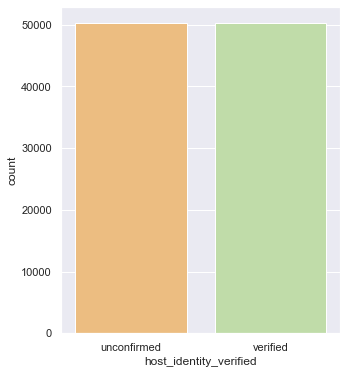

In [25]:
plt.figure(figsize=(5,6))
plt.xlabel("{}".format("host_identity_verified"))
sns.countplot(data=airbnb, x='host_identity_verified', palette='Spectral')
plt.show()

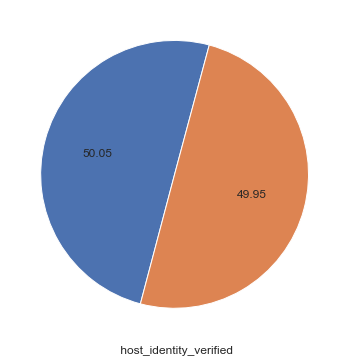

In [26]:
plt.figure(figsize=(6,9))
plt.xlabel(" {}".format("host_identity_verified"))
plt.pie(airbnb['host_identity_verified'].value_counts()*100/len(airbnb), autopct='%.2f', startangle=75)
plt.show()

The number of verification and non-verification is very close, which causes insecurity for the guest, and we can fix this by working to increase the number of verification

# Qstn - 2
**Who is Top 25 most reviewed neighbourhoods ?**

In [27]:
top_25 = airbnb.groupby(['neighbourhood'])['number of reviews'].sum().sort_values(ascending=False)[0:24]
top_25

neighbourhood
Bedford-Stuyvesant           267046.0
Williamsburg                 185310.0
Harlem                       174755.0
Bushwick                     121850.0
Hell's Kitchen               108868.0
East Village                  94920.0
Crown Heights                 87774.0
East Harlem                   80553.0
Upper West Side               76030.0
Upper East Side               68745.0
Chelsea                       57353.0
Midtown                       54653.0
Lower East Side               52008.0
Astoria                       49432.0
Greenpoint                    42960.0
East Elmhurst                 42481.0
Flushing                      40708.0
Washington Heights            38288.0
East Flatbush                 34947.0
Prospect-Lefferts Gardens     34931.0
Park Slope                    32479.0
West Village                  32280.0
Clinton Hill                  32163.0
Jamaica                       32123.0
Name: number of reviews, dtype: float64

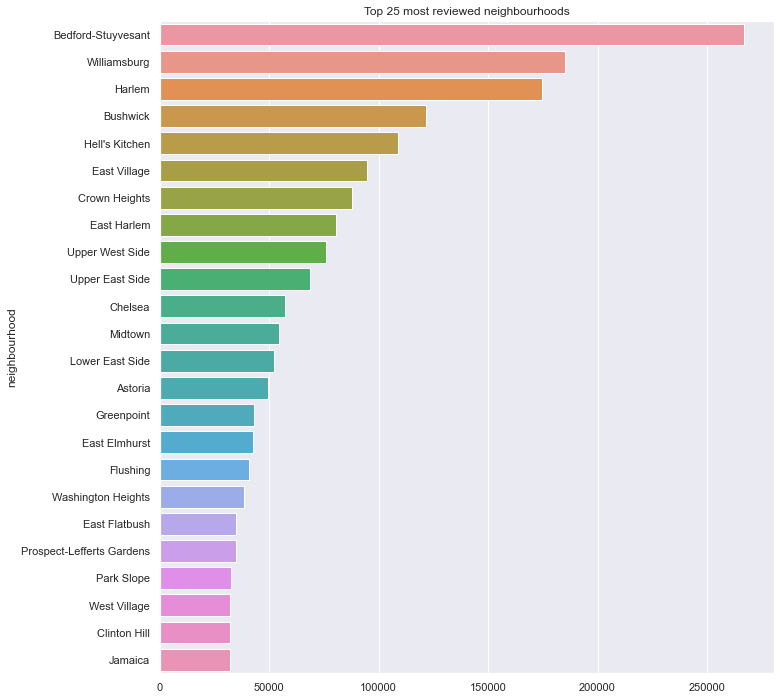

In [28]:
plt.figure(figsize=(11,12))
plt.title("Top 25 most reviewed neighbourhoods")
sns.barplot(x=top_25.values,y=top_25.index)
plt.show()

# Qstn - 3
**what is the main neighbourhood group ?**

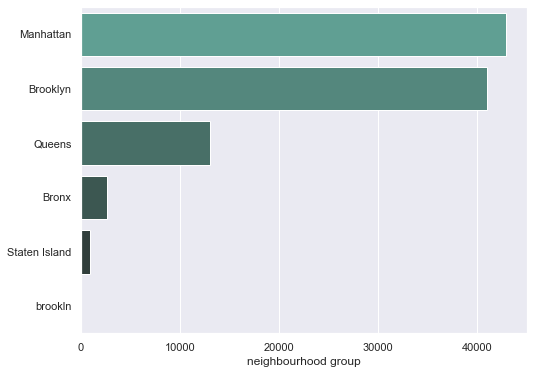

In [29]:
plt.figure(figsize=(8,6))
plt.xlabel("neighbourhood group")
sns.barplot(x=airbnb['neighbourhood group'].value_counts(),y=airbnb['neighbourhood group'].value_counts().index, palette="dark:#5A9_r")
plt.show()

# Qstn - 4
**What is the most available set of dates of the year ?**

In [30]:
# make groups every 3 months 
airbnb['availability_grp'] = np.where(airbnb['availability 365']<=90, '0-3 Months',
                   np.where((airbnb['availability 365'] > 9) & (airbnb['availability 365'] <= 180), '3-6 Months',
                   np.where((airbnb['availability 365'] > 180) & (airbnb['availability 365'] <= 270), '6-9 Months', '9-12 Months')))

In [31]:
airbnb['availability_grp'].value_counts()

0-3 Months     49187
9-12 Months    25041
3-6 Months     14666
6-9 Months     11701
Name: availability_grp, dtype: int64

<AxesSubplot:ylabel='availability_grp'>

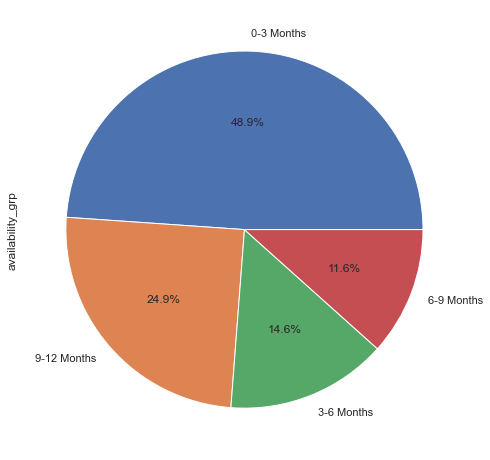

In [32]:
data = round(airbnb['availability_grp'].value_counts()/ airbnb.shape[0]*100,2)
data.plot.pie(autopct = '%1.1f%%',figsize =(8, 11))

# Qstn - 5
**Which neighbourhood do you give the highest ratings to?**

In [33]:
avg_rat_per_ngbhd = airbnb.groupby(['neighbourhood'])['review rate number'].mean().sort_values(ascending=False)[0:24]
avg_rat_per_ngbhd

neighbourhood
Glen Oaks             4.500000
Co-op City            4.400000
Gerritsen Beach       4.333333
Huguenot              4.111111
Eltingville           4.000000
West Farms            4.000000
Todt Hill             4.000000
Silver Lake           4.000000
Woodrow               4.000000
Rosebank              3.928571
Bull's Head           3.916667
Little Neck           3.875000
Oakwood               3.857143
Clifton               3.820513
Mill Basin            3.785714
Arden Heights         3.777778
Mount Eden            3.777778
Grymes Hill           3.722222
City Island           3.707317
Randall Manor         3.704545
Unionport             3.666667
Westchester Square    3.652174
Stapleton             3.650794
South Beach           3.642857
Name: review rate number, dtype: float64

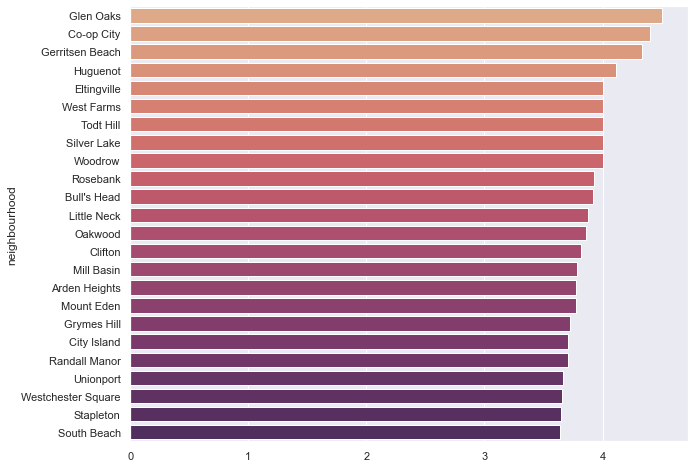

In [34]:
plt.figure(figsize=(10,8))
sns.barplot(x=avg_rat_per_ngbhd.values, y=avg_rat_per_ngbhd.index, palette='flare')
plt.show()

# Qstn - 6
**Is host identity verified effect on price ?**

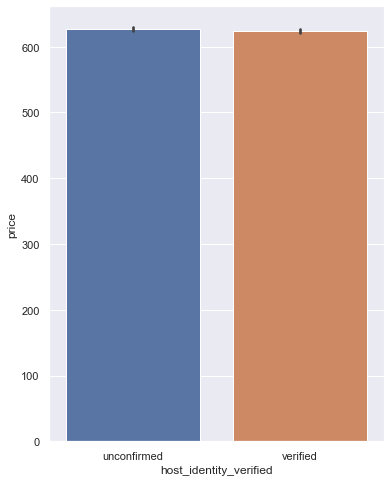

In [35]:
plt.figure(figsize=(6,8))
sns.barplot(x="host_identity_verified", y="price", data=airbnb)
plt.show()

According to the graph it is clear that "host identity" dosent have much effect on "price"

# Qstn - 7
**How is Neighbourhood effecting the data?**

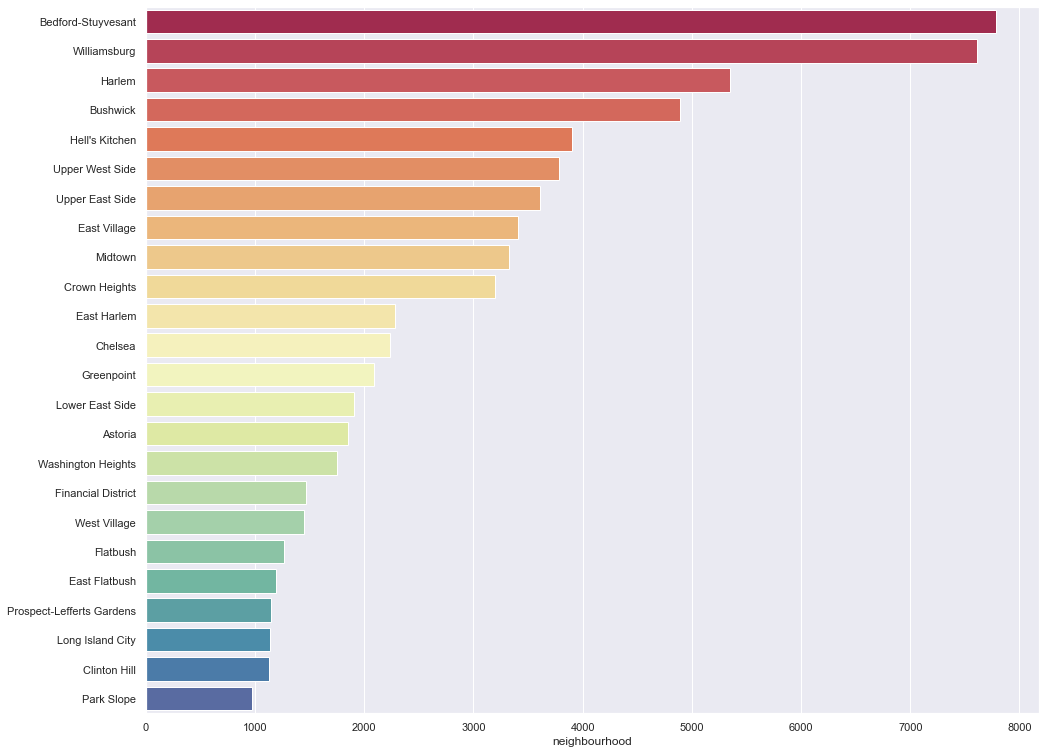

In [36]:
plt.figure(figsize=(16,13))
plt.xlabel("Neighbourhood")
sns.barplot(x=airbnb['neighbourhood'].value_counts()[0:24], y=airbnb['neighbourhood'].value_counts().index[0:24], palette="Spectral")
plt.show()